In [5]:
import os
import astropy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

from astropy.timeseries import LombScargle

%matplotlib inline

In [6]:
from IPython.display import display, HTML, Javascript, clear_output

display(HTML("<style>.container { width:99% !important; }</style>"))  # Jupyter 6
display(HTML("<style>.jp-Notebook { --jp-notebook-max-width: 98%; }</style>"))  # Jupyter 7

# define the paths where the data will be stores - NEED TO CHANGE THIS TO YOUR OWN PATH
outfile_base = './etv_out'  # for ETV
lk_download_dir = 'C:/dev/_juypter/PH_TESS_LightCurveViewer/data'  

# A command from shell that can be run to notify users, e.g., fitting is finished. Use "echo" if you do not have one
NOTIFY_CMD = "win-notify.bat"

if hasattr(lk, "conf"):  # default download dir
    lk.conf.cache_dir = lk_download_dir
if hasattr(lk.search, "sr_cache"):   # PR for persistent query result cache
    lk.search.sr_cache.cache_dir = lk_download_dir  # None
    lk.search.sr_cache.expire_second = 86400

## Plot `LcTools` generated TTVs for some of TICs 

In [50]:
def plot_oc(df, label, plot_line=False, ax=None):
    if ax is None:
        ax = plt.figure(figsize=(8, 4)).gca()
    period = np.nanmedian(np.diff(df["Calculated Time"]))
    ax.scatter(df["Calculated Time"], df["shift_mins"], marker = 'o', s=8**2, color = 'None', edgecolor = 'crimson', label=label);
    if plot_line:
        ax.plot(df["Calculated Time"], df["shift_mins"], );
    ax.set_xlabel("Time")
    ax.set_ylabel("O-C [min]")
    ax.legend(loc="upper left");
    ax.set_title(f"{label}, P: {period}")
    return ax


def to_periodgram(df, label, ax=None, pg_kwargs={}, also_plot=True):
    frequency, power = LombScargle(df['Calculated Time'], df['shift_mins']).autopower(**pg_kwargs)
    period = 1 / frequency

    pg = pd.DataFrame(dict(period=period, frequency=frequency, power=power))
    
    row_max = pg.iloc[np.argmax(pg.power)]    
    max_power = row_max["power"]
    period_at_max_power = row_max["period"]
    frequencey_at_max_power = row_max["frequency"]
    pg.attrs.update(dict(max_power=max_power, period_at_max_power=period_at_max_power, frequencey_at_max_power=frequencey_at_max_power))        
    
    if not also_plot:
        return pg

    # case also_plot is True

    np.argmax(pg.power)
    pg.iloc[np.argmax(pg.power)]    
    
    if ax is None:
        ax = plt.figure(figsize=(8, 4)).gca()
    ax.plot(period, power, label=label, color="gray", alpha=0.5)    
    ax.set_xlabel("Period")    
    ax.set_ylabel("Power")
    ax.axvline(period_at_max_power, linestyle="--", color="blue")
    ax.text(period_at_max_power * 1.05, max_power, f"P: {period_at_max_power:.6f} d", color="blue");
    ax.legend()
    return pg, ax

In [9]:
# LcTools TESS TTV data: https://drive.google.com/file/d/1cwTScigGB09VNLCxyYbq9uOnF5uPLQld/view
df_all = pd.read_csv(f"{lk_download_dir}/toi_ttvs_uncompressed_lctools.csv",
                 dtype={"POI": str}, na_values=["Null"],
                )
df_all["shift_mins"] = (df_all["Observed Time"] - df_all["Calculated Time"]) * 24 * 60

print("Num. stars:", len(df_all["Star ID"].unique()))

Num. stars: 6193


TICs to plot: [ 100014359  100097716  100099031  100100827 1001477809  100264497
  100267480    1003831  100389539  100504381]


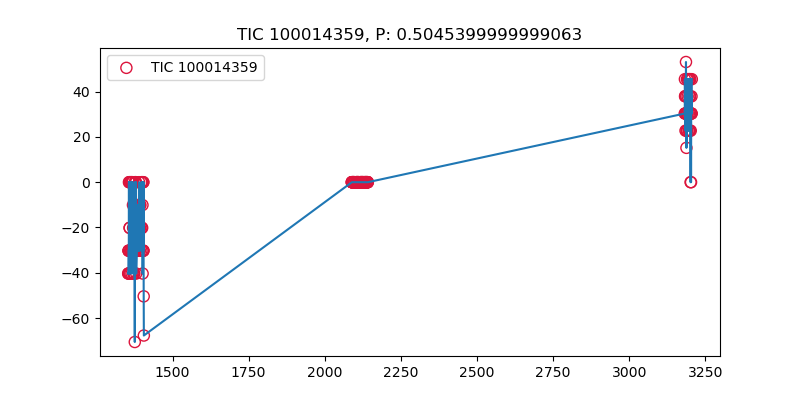

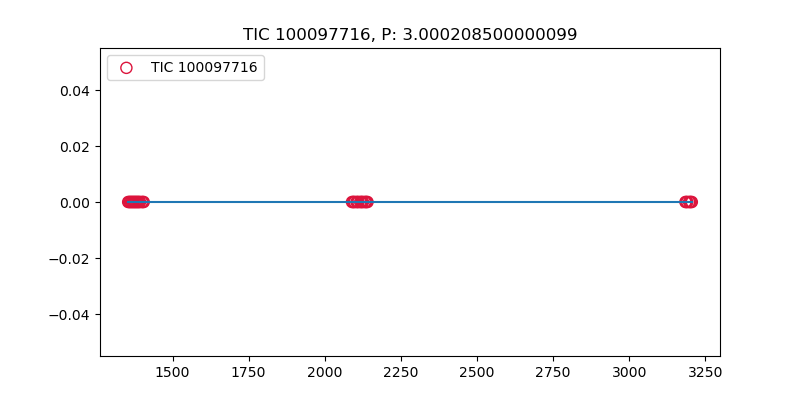

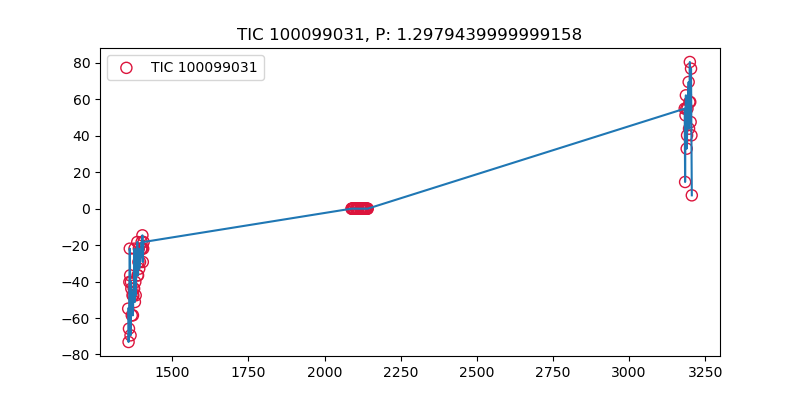

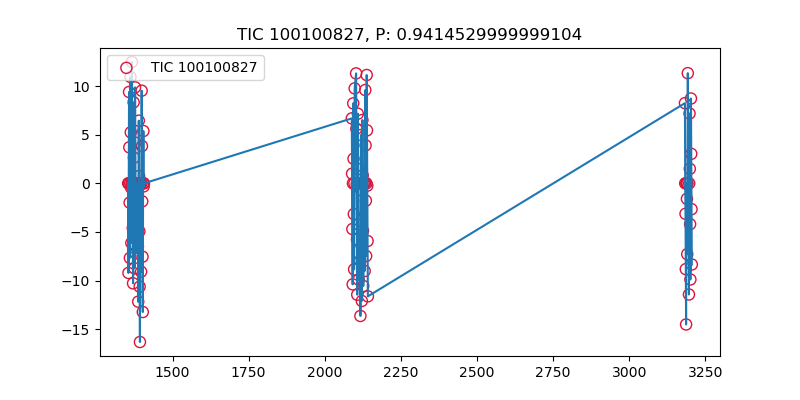

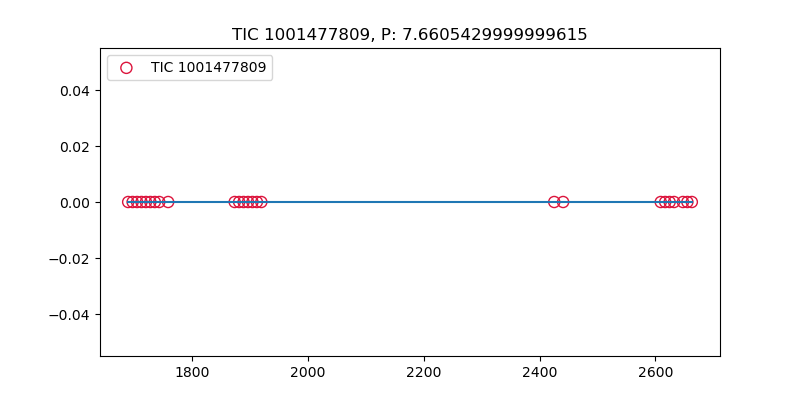

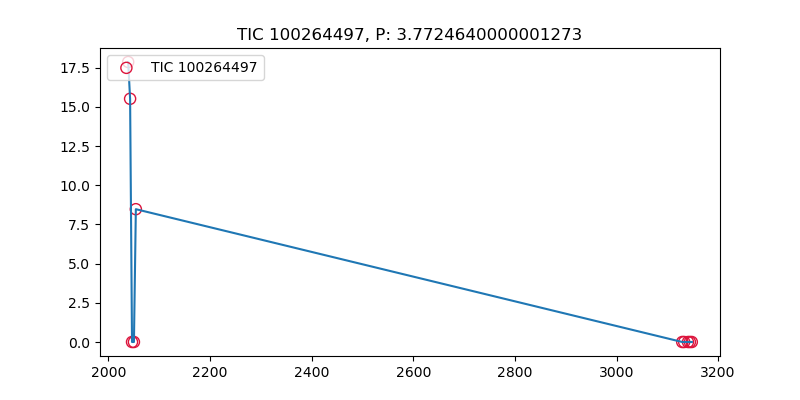

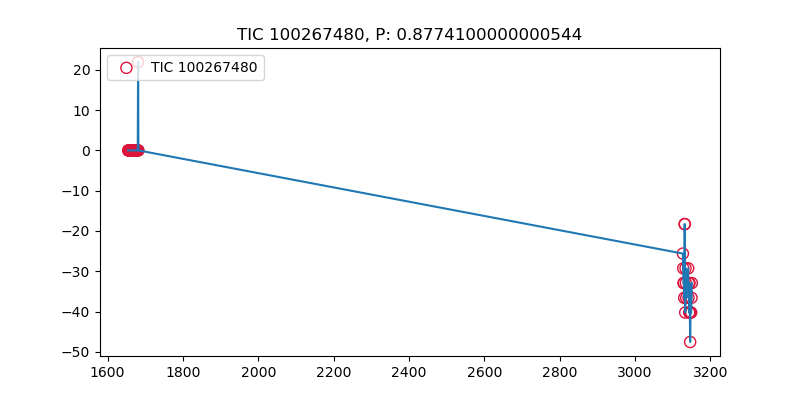

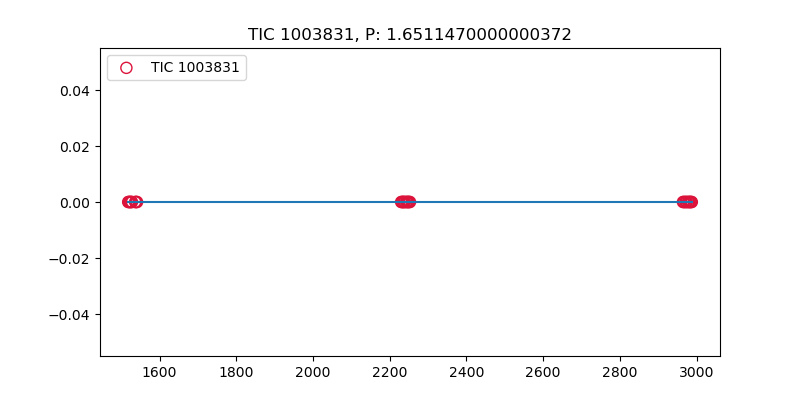

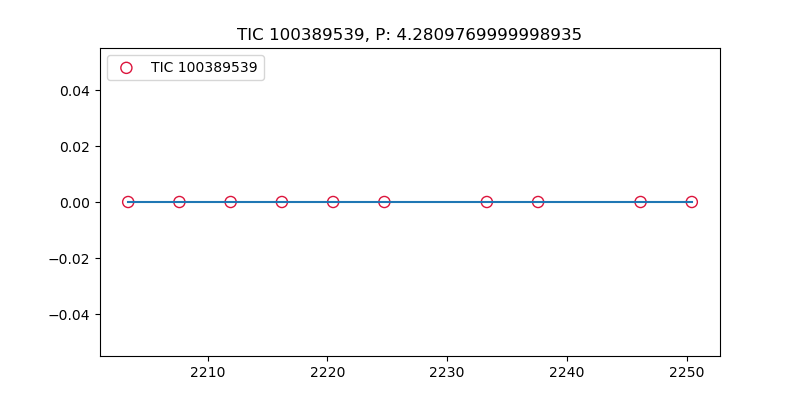

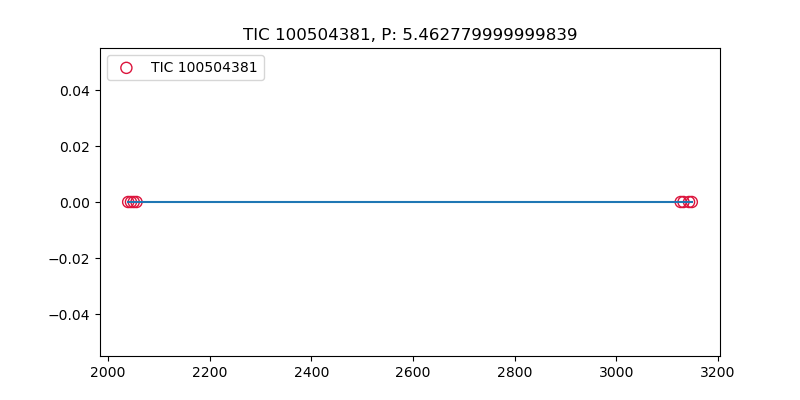

In [8]:
%matplotlib widget

tics = df_all["Star ID"].unique()[0:10]
print("TICs to plot:", tics)
for tic in tics:
    df = df_all[df_all["Star ID"] == tic]
    ax = plot_oc(df, label=f"TIC {tic}");

C:\pkg\_winNonPortables\miniforge3\envs\my_lk_plus\lib\site-packages\astropy\timeseries\periodograms\lombscargle\implementations\fast_impl.py:134: RuntimeWarning: invalid value encountered in divide
  power /= YY
C:\pkg\_winNonPortables\miniforge3\envs\my_lk_plus\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: The behavior of Series.argmax/argmin with skipna=False and NAs, or with all-NAs is deprecated. In a future version this will raise ValueError.
  return bound(*args, **kwds)
posx and posy should be finite values


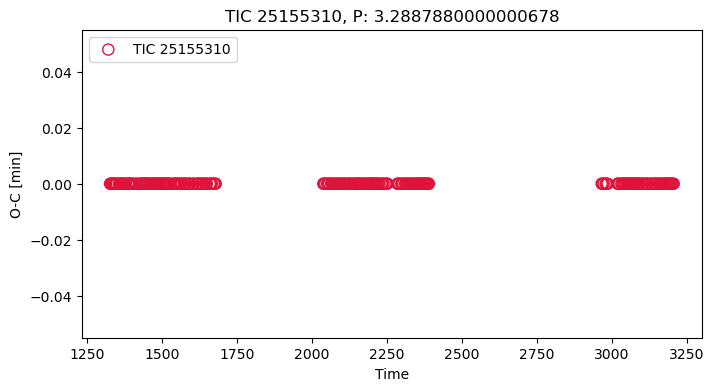

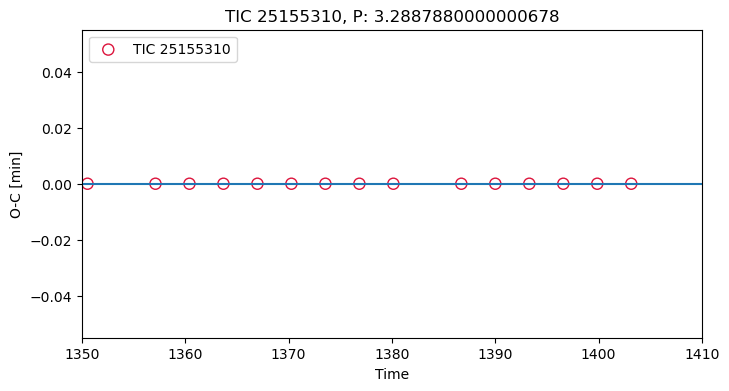

posx and posy should be finite values
posx and posy should be finite values


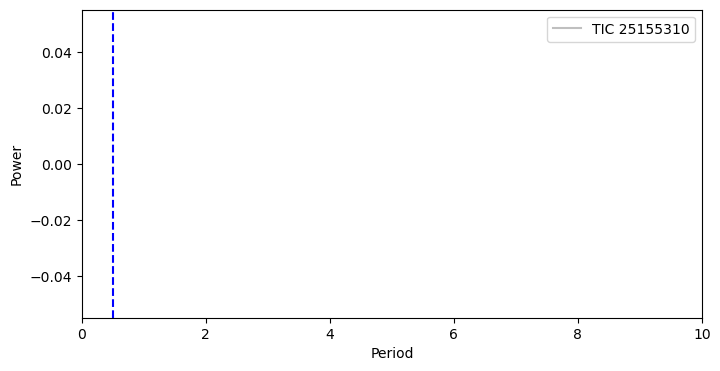

In [52]:
%matplotlib inline

tic = 25155310  # WASP-126

df = df_all[df_all["Star ID"] == tic]
ax = plot_oc(df, label=f"TIC {tic}");

ax = plot_oc(df, label=f"TIC {tic}", plot_line=True);
ax.set_xlim(1350, 1410);

pg, ax = to_periodgram(df, label=f"TIC {tic}", also_plot=True,
                       pg_kwargs=dict(maximum_frequency=1 / 0.5), # minimum_period=0.5
                      );
ax.set_xlim(
    # 0, pg.attrs["period_at_max_power"] * 6,
    0, 10,
);